In [119]:

import pandas as pd
import matplotlib.pyplot as plt
df2 = pd.read_excel("APPENDIX DATA.xlsx", sheet_name="Funds")
df2.head()

,Asset Class,Fund Type,Fund,CCY,Advanced Ratio,Beta,CAPM,Sharpe Ratio
0,Fixed Income,U.S Inv Grade Corporate Bonds,AB American Income,USD,80,1.01,10.00,0.08
1,Fixed Income,U.S Inv Grade Corporate Bonds,Schroder Global Credit Income,USD,80,1.21,11.19,0.14
2,Fixed Income,U.S Inv Grade Corporate Bonds,PIMCO Income,USD,80,1.12,9.64,0.25
3,Fixed Income,U.S Inv Grade Corporate Bonds,JPMorgan Income,USD,70,0.61,7.80,0.18
4,Fixed Income,U.S High Yield Corporate Bonds,BlackRock Dynamic High Income,USD,70,0.99,11.72,0.15


In [120]:
import numpy as np
def get_sml(df2, asset_class):
    R_f = 0.04
    E_R_m = 9.94

    # expected return for each security

    # Increase the size of the plot
    plt.figure(figsize=(8,12))  # adjust width and height as necessary

    # Scatter plot
    plt.scatter(df2['Beta'], df2['CAPM'], marker='o', label='Fund')

    # Create empty list to collect texts for adjust_text
    texts = []
    for i, txt in enumerate(df2['Fund']):
        texts.append(plt.text(df2['Beta'].iloc[i], df2['CAPM'].iloc[i], txt, fontsize=7))

    
    # Plotting the SML
    beta_range = [min(df2['Beta'])-0.2, max(df2['Beta'])+0.2]  # added a buffer
    sml_values = [R_f + beta * (E_R_m - R_f) for beta in beta_range]
    print(sml_values)
    plt.plot(beta_range, sml_values, color='red', label='SML')

    # Adjusting x and y limits for even more space (optional)
    plt.xlim(min(df2['Beta'])-0.1, max(df2['Beta'])+0.3)
    plt.ylim(min(df2['CAPM'])-2, max(df2['CAPM'])+2)  # adjust buffer as necessary

    # Setting labels, title, legend, and grid
    plt.xlabel('Beta (Systematic Risk)')
    plt.ylabel('Expected Return (%)')
    plt.title('Security Market Line (SML) ' + asset_class)
    plt.legend()
    plt.grid(True)

    # increase y ticks 
    y_ticks = plt.yticks()[0]
    new_y_ticks = list(range(int(min(y_ticks)), int(max(y_ticks)) + 1, 1))

    start, end = plt.xlim()

    plt.yticks(new_y_ticks)

    plt.xticks(np.arange(start, end, step=0.1))  # Here 0.1 is the interval size, adjust as needed

    # Display the plot
    plt.show()




In [121]:
def get_sml_table(df2):
    R_f = 0.04
    E_R_m = 9.94

    # expected return for each security 
    df2['SML_Value'] = R_f + df2['Beta'] * (E_R_m - R_f)

    df2['Position'] = np.where(df2['CAPM'] > df2['SML_Value'], 'Above', 
                           np.where(df2['CAPM'] < df2['SML_Value'], 'Below', 'On'))

                           # Now, you can filter out the assets above and below the SML line:
    assets_above = df2[df2['Position'] == 'Above']
    assets_below = df2[df2['Position'] == 'Below']
    
    print("Assets Above the SML:")
    print(assets_above[['Fund', 'Beta', 'CAPM']])
    

    print("\nAssets Below the SML:")
    print(assets_below[['Fund', 'Beta', 'CAPM']])

In [122]:
get_sml_table(df2)


Assets Above the SML:
                                                 Fund      Beta   CAPM
3                                     JPMorgan Income  0.610000   7.80
4                       BlackRock Dynamic High Income  0.990000  11.72
5                        PIMCO Global High Yield Bond  0.770000   9.05
6                             Robeco High Yield Bonds  0.800000   8.87
7                        Barings U.S. High Yield Bond  0.980000   9.82
8                          AXA Global Strategic Bonds  0.710000   8.93
9                                     HSBC Asian Bond  0.780000   8.63
10                         BlackRock Asian Tiger Bond  0.890000   9.82
11                      HSBC GIF RMB Fixed Income USD  0.930000   9.29
12                           BlackRock China Bond USD  0.850000   8.99
14                         HSBC Asia High Income Bond -0.000370   4.00
16                      HSBC GIF RMB Fixed Income RMB  0.890000   9.29
18                        Schroder Asian Asset Income  

In [123]:
df2.to_csv("smldata.csv")

[-1.94594, 14.494]


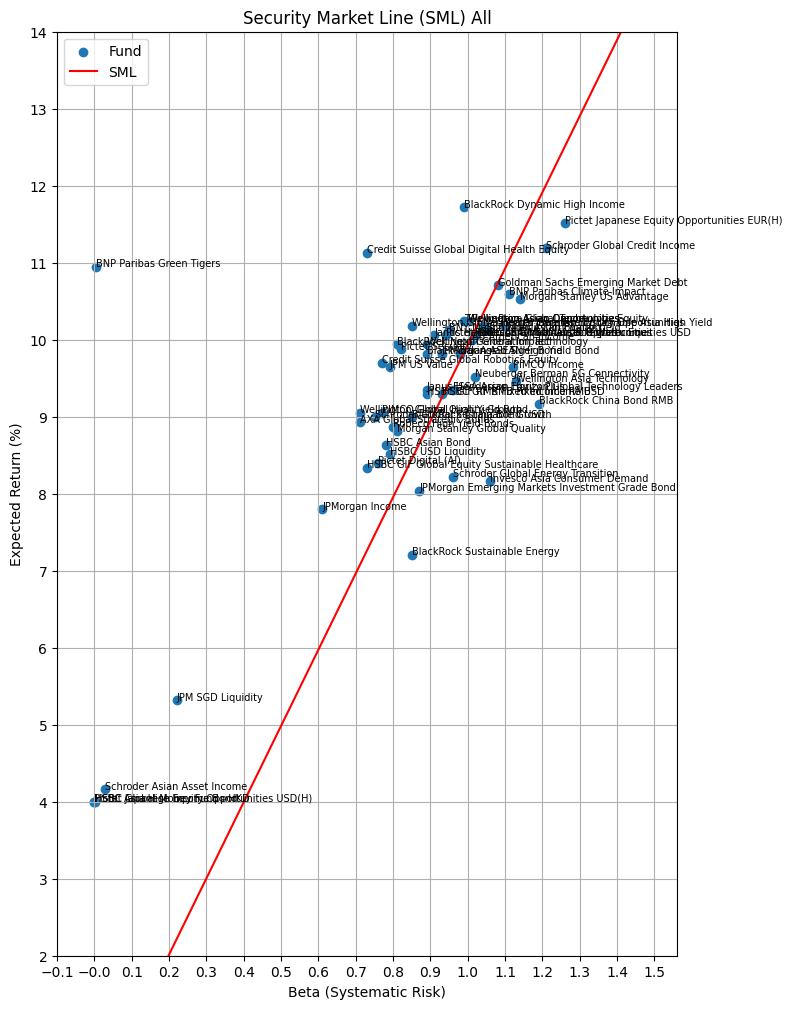

In [124]:

get_sml(df2,"All")


In [125]:
df2.columns

Index(['Asset Class ', 'Fund Type', 'Fund', 'CCY', 'Advanced Ratio ', 'Beta',
       'CAPM', 'Sharpe Ratio', 'SML_Value', 'Position'],
      dtype='object')

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_table_portfolios(data):

    # Extract CAPM (as expected returns) and Beta (as risk) into arrays
    expected_returns = data['CAPM'].values
    risks = data['Beta'].values
    individual_sharpe_ratios = data['Sharpe Ratio'].values

    p_ret = []  # Define an empty array for portfolio returns
    p_vol = []  # Define an empty array for portfolio risks
    p_weights = []  # Define an empty array for asset weights
    p_sharpe = []  # Define an empty array for portfolio Sharpe ratios

    num_securities = len(expected_returns)
    num_portfolios = 10000

    for portfolio in range(num_portfolios):
        weights = np.random.random(num_securities)
        weights /= np.sum(weights)
        p_weights.append(weights)
        
        # Calculate portfolio return and risk
        returns = np.dot(weights, expected_returns)
        p_ret.append(returns)
        volatility = np.sqrt(np.dot(weights ** 2, risks ** 2))
        p_vol.append(volatility)

        # Calculate portfolio Sharpe ratio based on weighted average of individual assets
        portfolio_sharpe = np.dot(weights, individual_sharpe_ratios)
        p_sharpe.append(portfolio_sharpe)

    # Save results in a DataFrame
    results_data = {'Returns': p_ret, 'Risk': p_vol, 'Sharpe Ratio': p_sharpe}
    
    for i, security in data.iterrows():
        asset_name = security["Fund"]
        weights_column_name = f"{asset_name} Weight"
        weights = [weight_set[i] for weight_set in p_weights]
        results_data[weights_column_name] = weights

    portfolios = pd.DataFrame(results_data)

    return portfolios


In [127]:
ports = get_table_portfolios(df2)
ports

,Returns,Risk,Sharpe Ratio,AB American Income Weight,Schroder Global Credit Income Weight,PIMCO Income Weight,JPMorgan Income Weight,BlackRock Dynamic High Income Weight,PIMCO Global High Yield Bond Weight,Robeco High Yield Bonds Weight,...,Schroder Global Sustainable Growth Weight,Pictet Global Environmental Opportunities Weight,RobecoSAM Sustainable Water Equities USD Weight,Neuberger Berman Sustainable Asia High Yield Weight,BlackRock Sustainable Energy Weight,Wellington Global Impact Weight,Schroder Global Energy Transition Weight,BNP Paribas Green Tigers Weight,HSBC GIF Global Equity Sustainable Healthcare Weight,BNP Paribas Climate Impact Weight
0,9.097525,0.136759,0.013944,0.017534,0.014656,0.010294,0.007587,0.003418,0.000382,0.027379,...,0.018303,0.007932,0.025511,0.009775,0.012720,0.003223,0.021214,0.023241,0.019764,0.014522
1,9.044436,0.135048,0.055607,0.014951,0.001285,0.026722,0.019049,0.009058,0.033298,0.011408,...,0.000264,0.004009,0.006947,0.034295,0.032361,0.031331,0.014062,0.016551,0.002593,0.024601
2,9.110755,0.128326,0.027394,0.023519,0.016368,0.025686,0.029871,0.019127,0.024233,0.025849,...,0.007217,0.017002,0.028749,0.022581,0.007790,0.002906,0.003739,0.019539,0.019582,0.015159
3,9.334212,0.138196,0.025866,0.013415,0.014631,0.030084,0.012481,0.027944,0.004219,0.008972,...,0.008110,0.021046,0.024716,0.000035,0.009534,0.022989,0.025209,0.021950,0.019389,0.010416
4,9.233382,0.136492,0.044689,0.005715,0.030600,0.019011,0.027733,0.020654,0.010887,0.015377,...,0.008820,0.014401,0.029960,0.031653,0.004955,0.007276,0.020560,0.013629,0.031920,0.032746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.302087,0.134526,0.071987,0.023243,0.002169,0.001058,0.004965,0.014715,0.021084,0.004620,...,0.004088,0.022547,0.015793,0.020255,0.025621,0.019429,0.015703,0.027050,0.020462,0.014996
9996,9.222432,0.130502,0.031718,0.011384,0.014373,0.023771,0.020559,0.030649,0.017989,0.002234,...,0.011634,0.024207,0.007270,0.029780,0.019254,0.003206,0.002161,0.025939,0.017174,0.023926
9997,9.152248,0.133072,0.068960,0.013903,0.008059,0.033368,0.015088,0.016105,0.034202,0.031093,...,0.004860,0.018782,0.002586,0.003810,0.014366,0.016585,0.026231,0.020024,0.030124,0.036258
9998,8.953365,0.138246,0.033968,0.008232,0.000531,0.015940,0.007701,0.001562,0.000756,0.035349,...,0.024326,0.030248,0.008041,0.021266,0.032896,0.014375,0.003399,0.017892,0.006791,0.003761


In [128]:
def find_optimal_portfolio(portfolios, target_risk):
    # Filter portfolios that meet the desired risk criteria
    filtered_portfolios = portfolios[portfolios['Risk'] * 100 < target_risk]
    
    # Find the portfolio with the highest Sharpe ratio among the filtered portfolios
    optimal_portfolio = filtered_portfolios.loc[filtered_portfolios['Sharpe Ratio'].idxmax()]
    
    # Print the optimal portfolio's details
    print(optimal_portfolio)
    
    return optimal_portfolio

# Example usage:
# Replace 'portfolios' with your DataFrame of calculated portfolios, and 'target_risk' with your desired risk level in decimals (e.g., 0.2 for 20%)


In [129]:
ports["Risk"].describe()

count    10000.000000
mean         0.134688
std          0.004998
min          0.120093
25%          0.131220
50%          0.134459
75%          0.137934
max          0.157582
Name: Risk, dtype: float64

In [130]:
result = find_optimal_portfolio(ports, 15)

Returns                                                     9.288248
Risk                                                        0.146201
Sharpe Ratio                                                0.228745
AB American Income Weight                                   0.001269
Schroder Global Credit Income Weight                        0.033097
PIMCO Income Weight                                         0.028923
JPMorgan Income Weight                                      0.005998
BlackRock Dynamic High Income Weight                        0.033774
PIMCO Global High Yield Bond Weight                         0.001305
Robeco High Yield Bonds Weight                              0.033636
Barings U.S. High Yield Bond Weight                         0.010080
AXA Global Strategic Bonds Weight                           0.010656
HSBC Asian Bond Weight                                      0.015800
BlackRock Asian Tiger Bond Weight                           0.004751
HSBC GIF RMB Fixed Income USD Weig

In [131]:
results_pd = pd.DataFrame(result)


In [133]:
results_pd.to_csv("weights.csv")

In [134]:
ports

,Returns,Risk,Sharpe Ratio,AB American Income Weight,Schroder Global Credit Income Weight,PIMCO Income Weight,JPMorgan Income Weight,BlackRock Dynamic High Income Weight,PIMCO Global High Yield Bond Weight,Robeco High Yield Bonds Weight,...,Schroder Global Sustainable Growth Weight,Pictet Global Environmental Opportunities Weight,RobecoSAM Sustainable Water Equities USD Weight,Neuberger Berman Sustainable Asia High Yield Weight,BlackRock Sustainable Energy Weight,Wellington Global Impact Weight,Schroder Global Energy Transition Weight,BNP Paribas Green Tigers Weight,HSBC GIF Global Equity Sustainable Healthcare Weight,BNP Paribas Climate Impact Weight
0,9.097525,0.136759,0.013944,0.017534,0.014656,0.010294,0.007587,0.003418,0.000382,0.027379,...,0.018303,0.007932,0.025511,0.009775,0.012720,0.003223,0.021214,0.023241,0.019764,0.014522
1,9.044436,0.135048,0.055607,0.014951,0.001285,0.026722,0.019049,0.009058,0.033298,0.011408,...,0.000264,0.004009,0.006947,0.034295,0.032361,0.031331,0.014062,0.016551,0.002593,0.024601
2,9.110755,0.128326,0.027394,0.023519,0.016368,0.025686,0.029871,0.019127,0.024233,0.025849,...,0.007217,0.017002,0.028749,0.022581,0.007790,0.002906,0.003739,0.019539,0.019582,0.015159
3,9.334212,0.138196,0.025866,0.013415,0.014631,0.030084,0.012481,0.027944,0.004219,0.008972,...,0.008110,0.021046,0.024716,0.000035,0.009534,0.022989,0.025209,0.021950,0.019389,0.010416
4,9.233382,0.136492,0.044689,0.005715,0.030600,0.019011,0.027733,0.020654,0.010887,0.015377,...,0.008820,0.014401,0.029960,0.031653,0.004955,0.007276,0.020560,0.013629,0.031920,0.032746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.302087,0.134526,0.071987,0.023243,0.002169,0.001058,0.004965,0.014715,0.021084,0.004620,...,0.004088,0.022547,0.015793,0.020255,0.025621,0.019429,0.015703,0.027050,0.020462,0.014996
9996,9.222432,0.130502,0.031718,0.011384,0.014373,0.023771,0.020559,0.030649,0.017989,0.002234,...,0.011634,0.024207,0.007270,0.029780,0.019254,0.003206,0.002161,0.025939,0.017174,0.023926
9997,9.152248,0.133072,0.068960,0.013903,0.008059,0.033368,0.015088,0.016105,0.034202,0.031093,...,0.004860,0.018782,0.002586,0.003810,0.014366,0.016585,0.026231,0.020024,0.030124,0.036258
9998,8.953365,0.138246,0.033968,0.008232,0.000531,0.015940,0.007701,0.001562,0.000756,0.035349,...,0.024326,0.030248,0.008041,0.021266,0.032896,0.014375,0.003399,0.017892,0.006791,0.003761


In [136]:
def plot_efficient_frontier(ports):
    plt.figure(figsize=(10, 6))
    plt.scatter(ports['Risk'], ports['Returns'], c=ports['Returns'] / ports['Risk'], marker='o', cmap='viridis')
    plt.title('Efficient Frontier')
    plt.xlabel('RIsk')
    plt.ylabel('Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()



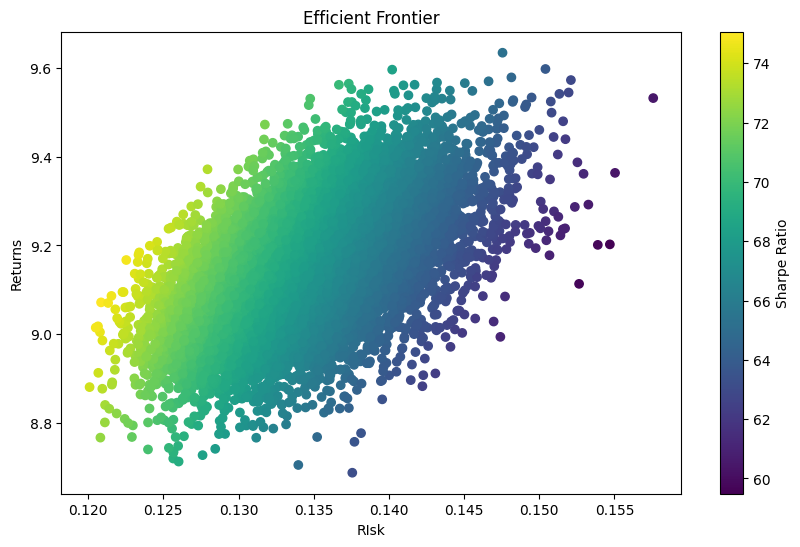

In [137]:
plot_efficient_frontier(ports)